In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
#plt.style.use('ggplot')
plt.style.use('dark_background')

In [118]:
df = pd.read_csv('C:/Users/tuf/Downloads/museum_visitors.csv')

In [78]:
df.Date

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
5     2014-06-01
6     2014-07-01
7     2014-08-01
8     2014-09-01
9     2014-10-01
10    2014-11-01
11    2014-12-01
12    2015-01-01
13    2015-02-01
14    2015-03-01
15    2015-04-01
16    2015-05-01
17    2015-06-01
18    2015-07-01
19    2015-08-01
20    2015-09-01
21    2015-10-01
22    2015-11-01
23    2015-12-01
24    2016-01-01
25    2016-02-01
26    2016-03-01
27    2016-04-01
28    2016-05-01
29    2016-06-01
30    2016-07-01
31    2016-08-01
32    2016-09-01
33    2016-10-01
34    2016-11-01
35    2016-12-01
36    2017-01-01
37    2017-02-01
38    2017-03-01
39    2017-04-01
40    2017-05-01
41    2017-06-01
42    2017-07-01
43    2017-08-01
44    2017-09-01
45    2017-10-01
46    2017-11-01
47    2017-12-01
48    2018-01-01
49    2018-02-01
50    2018-03-01
51    2018-04-01
52    2018-05-01
53    2018-06-01
54    2018-07-01
55    2018-08-01
56    2018-09-01
57    2018-10-01
58    2018-11-

In [79]:
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків). 

Перш за все, зробимо колонки для зручності. Переведемо їх у нижній регістр та зробимо

Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення
(date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center). 

In [120]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [81]:
df.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [82]:
df.isna().mean()

date                                    0.0
avila_adobe                             0.0
firehouse_museum                        0.0
chinese_american_museum                 0.0
america_tropical_interpretive_center    0.0
dtype: float64

In [83]:
df.dtypes

date                                    object
avila_adobe                              int64
firehouse_museum                         int64
chinese_american_museum                  int64
america_tropical_interpretive_center     int64
dtype: object

In [122]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')

In [85]:
df.dtypes

date                                    datetime64[ns]
avila_adobe                                      int64
firehouse_museum                                 int64
chinese_american_museum                          int64
america_tropical_interpretive_center             int64
dtype: object

In [86]:
df.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01 00:01:00,24778,4486,1581,6602
1,2014-01-01 00:02:00,18976,4172,1785,5029
2,2014-01-01 00:03:00,25231,7082,3229,8129
3,2014-01-01 00:04:00,26989,6756,2129,2824
4,2014-01-01 00:05:00,36883,10858,3676,10694


Вивести перші 5 рядків датасету. 

In [87]:
df.head(5)

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01 00:01:00,24778,4486,1581,6602
1,2014-01-01 00:02:00,18976,4172,1785,5029
2,2014-01-01 00:03:00,25231,7082,3229,8129
3,2014-01-01 00:04:00,26989,6756,2129,2824
4,2014-01-01 00:05:00,36883,10858,3676,10694


Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 

In [88]:
df.duplicated().sum()
#немає в наявності в нашої таблиці дублікатів

0

Про які роки містить інформацію датасет. 

для того щоб мати справу з датою, ми саме і перевели строку в формат дати, та явно прописали формат, щоб система не зчитала
місяць як дату и навпаки.

In [89]:
df.date.dt.year.value_counts()
#ми можеемо побачити що в наявності такі роки :

date
2014    12
2015    12
2016    12
2017    12
2018    11
Name: count, dtype: int64

Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду. 

In [125]:
#пропоную згрупуватися по рокам, а потім додати історію з кожного місяця
df['year'] = df.date.dt.year

In [91]:
t = df.groupby('year')\
.agg({'avila_adobe':np.mean,'firehouse_museum':np.mean,'chinese_american_museum':np.mean,'america_tropical_interpretive_center':np.mean})

In [92]:
t

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
year,,,,
2014,27776.250000,10778.166667,2108.666667,8076.416667
2015,26459.750000,6280.583333,2446.583333,9045.666667
2016,23398.666667,5386.083333,3107.000000,7201.833333
2017,22526.166667,5018.166667,3061.583333,6323.333333
2018,19791.636364,4758.272727,2897.090909,4686.090909


In [215]:
t.transpose().style.background_gradient(axis=1, cmap='autumn_r')
# для avila_adobe,firehouse_museum,america_tropical_interpretive_center останні роки були не такі прибуткові с точки зору 
# кількості клієнтів, а для america_tropical_interpretive_center перші два роки були не такі прибуткові, а далі ліпше

year,2014,2015,2016,2017,2018
avila_adobe,27776.250000,26459.750000,23398.666667,22526.166667,19791.636364
firehouse_museum,10778.166667,6280.583333,5386.083333,5018.166667,4758.272727
chinese_american_museum,2108.666667,2446.583333,3107.000000,3061.583333,2897.090909
america_tropical_interpretive_center,8076.416667,9045.666667,7201.833333,6323.333333,4686.090909


In [94]:
g= df.groupby('year')\
.agg({'avila_adobe':np.median,'firehouse_museum':np.median,'chinese_american_museum':np.median,'america_tropical_interpretive_center':np.median})

In [95]:
g.transpose().style.background_gradient(axis=1, cmap='autumn_r')

year,2014,2015,2016,2017,2018
avila_adobe,27492.000000,25576.500000,23296.500000,22166.500000,19280.000000
firehouse_museum,6119.500000,5568.000000,5049.500000,4842.000000,4622.000000
chinese_american_museum,2050.000000,2375.500000,2577.000000,2726.500000,2518.000000
america_tropical_interpretive_center,7742.500000,8569.000000,6669.000000,6478.000000,4694.000000


так. при медіані значення меньші аніж з середніми, через виброси. Але ситуація не страшна, виброси є, але середнє
значення ситуацію не змінює

Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 

In [96]:
the_most_popular_msm = df.query('year==2018').groupby('year').agg({'firehouse_museum':['max','min'],'avila_adobe':['max','min'],'chinese_american_museum':['max','min'],'america_tropical_interpretive_center':['max','min']})

In [97]:
the_most_popular_msm.reset_index()

year firehouse_museum       avila_adobe        chinese_american_museum  \
                     max   min         max    min                     max   
0  2018             8013  3306       25173  14718                    4960   

        america_tropical_interpretive_center        
    min                                  max   min  
0  2146                                 5837  3180

можемо взяти по роках. По роках в нас же була відповідь, але для кожного музею своя, зараз же ми зробимо загальну

In [124]:
df['total_people'] = (df.avila_adobe) + (df.firehouse_museum) + (df.chinese_american_museum) + (df.america_tropical_interpretive_center)

In [105]:
df.groupby('year').agg({'total_people':'sum'}).sort_values('total_people',ascending = False)
# якщо ми зсумуємо кожен музей, то пожемо побачити, що сумарно все йде на спад. Якщо взяти окремо, то у всіх йде також на спад
# поріавняно с минулими роками окрім chinese_american_museum

,total_people
year,
2014,584874
2015,530791
2016,469123
2017,443151
2018,353464


Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року 

In [107]:
df.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,year,month,month_name,total_people
0,2014-01-01 00:01:00,24778,4486,1581,6602,2014,1,January,37447
1,2014-01-01 00:02:00,18976,4172,1785,5029,2014,1,January,29962
2,2014-01-01 00:03:00,25231,7082,3229,8129,2014,1,January,43671
3,2014-01-01 00:04:00,26989,6756,2129,2824,2014,1,January,38698
4,2014-01-01 00:05:00,36883,10858,3676,10694,2014,1,January,62111


In [127]:
df['month_name'] = df.date.dt.month_name()

In [130]:
df.groupby('month_name').agg({'total_people':'sum'}).sort_values('total_people',ascending=False)
#якщо взяти саме місяці, то можемо побачити що зимові на самому низі. Більш теплі місяці - сама гарна відвідуваність 

,total_people
month_name,
May,275278
July,249602
September,232982
August,219732
June,207199
October,202842
March,198769
April,193720
November,173094


Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році 

<Axes: xlabel='date', ylabel='total_people'>

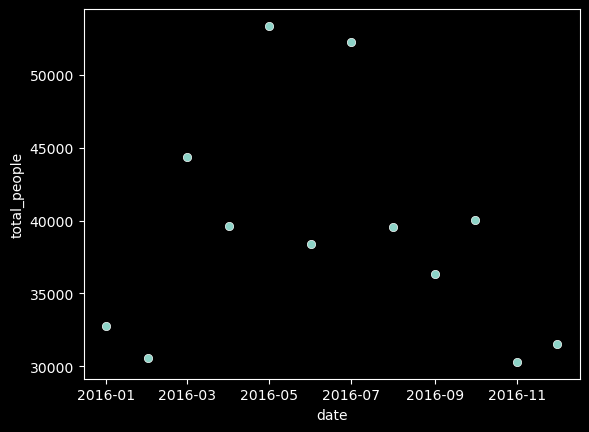

In [143]:
sns.scatterplot(data = df.query('year==2016'), x='date',y='total_people')
# якщо взяти 16 рік, то ми не можемо побачити тут кореляції
# на цьому прикладі ми не бачимо ніякох закономірності

<Axes: xlabel='month_name'>

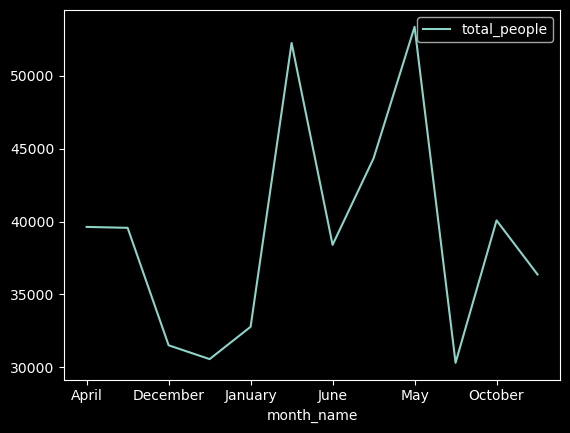

In [142]:
df.query('year==2016').groupby('month_name').agg({'total_people':'sum'}).plot()
#з цього можна зробити такий висновок, що кореляція не завжди є гарним показником, побудуємо звичайний лінійний графік та побачимо  залежність.
#хоча на кореляції ми могли сказати що зв'язку ніякого немає, а він є

<Axes: xlabel='date', ylabel='total_people'>

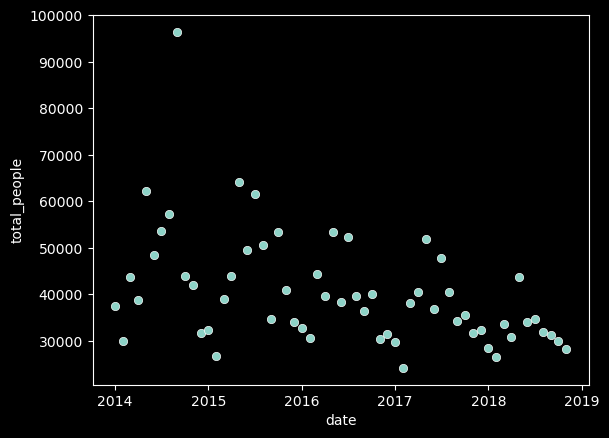

In [135]:
sns.scatterplot(data = df, x='date',y='total_people')
#навіть коли візьмемо всі роки, то ми не будемо бачити кореляції тут

Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

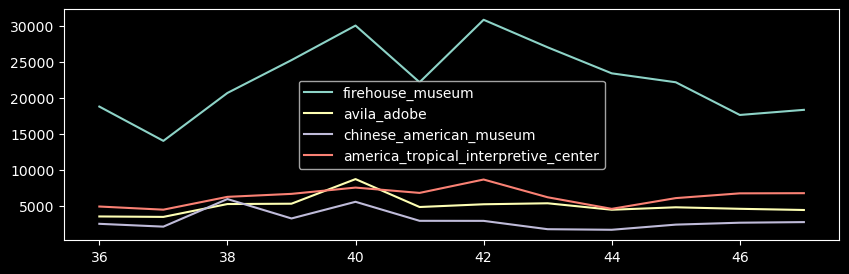

In [183]:
plt.figure(figsize=(10,3))
df.query('year==2017').avila_adobe.plot()
df.query('year==2017').firehouse_museum.plot()
df.query('year==2017').chinese_american_museum.plot()
df.query('year==2017').america_tropical_interpretive_center.plot()
plt.legend(legend)

In [182]:
legend = pd.Series(['firehouse_museum','avila_adobe','chinese_american_museum','america_tropical_interpretive_center'])

Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки

In [210]:
df.groupby(['year','month_name']).agg({'avila_adobe':'sum'})\
  .sort_values('avila_adobe',ascending=False).head()

avila_adobe
year month_name             
2015 July              41242
2014 August            37680
     May               36883
2015 May               34383
2014 July              32378

In [212]:
df.groupby(['year','month_name']).agg({'firehouse_museum':'sum'})\
  .sort_values('firehouse_museum',ascending=False).head()

,,firehouse_museum
year,month_name,
2014,September,61192
2015,May,12528
2014,May,10858
2016,May,9315
2015,October,8882


In [213]:
df.groupby(['year','month_name']).agg({'chinese_american_museum':'sum'})\
  .sort_values('chinese_american_museum',ascending=False).head()

chinese_american_museum
year month_name                         
2016 March                          7702
2017 March                          5966
     May                            5585
2018 May                            4960
2016 May                            4565

In [214]:
df.groupby(['year','month_name']).agg({'america_tropical_interpretive_center':'sum'})\
  .sort_values('america_tropical_interpretive_center',ascending=False).head()

america_tropical_interpretive_center
year month_name                                      
2014 July                                       13490
2015 May                                        13207
     October                                    12524
2016 July                                       12188
2015 August                                     12096

як ми можемо побачити,  що піки відвідуваності,як правило, відбуваються в теплі сезони преважно це літо і в більшості музеїв піки 
були в періоди 2014-2015 років.